[Reference](https://towardsdev.com/how-to-compare-data-both-by-visuals-and-statistics-in-python-part-i-c4c41fdcec55)

In [1]:
import pandas as pd
import numpy as np

N=1000
groups=['control', 'treatment']
genders=[0, 1]
arms=['arm 1', 'arm 2',' arm 3','arm 4']


df=pd.DataFrame({'Group': np.random.choice(groups, size=N),
                 'Gender': np.random.choice(genders, size=N),
                 'Age': np.random.randint(25, 35, size=1000),
                 'Income': np.random.normal(500, 500, size=1000)})

df['Arm']=df['Group'].apply(lambda x: np.nan if x=='control' else np.random.choice(arms))
m=abs(df['Income'].min())
df['Income']=df['Income'].apply(lambda x: round(x, 2)+m)

Text(0.5, 1.0, 'Boxplot')

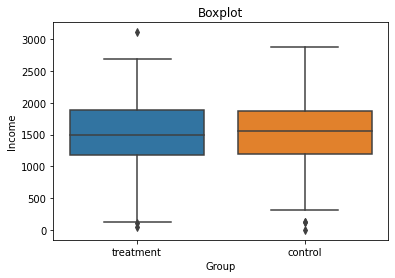

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df, x='Group', y='Income')
plt.title("Boxplot")

Text(0.5, 1.0, 'Histogram')

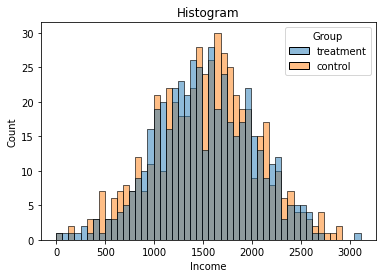

In [3]:
sns.histplot(data=df, x='Income', hue='Group', bins=50)
plt.title("Histogram")

Text(0.5, 1.0, 'Density Histogram')

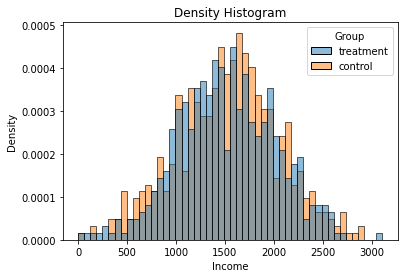

In [4]:
sns.histplot(data=df, x='Income', hue='Group', bins=50, stat='density')
plt.title("Density Histogram")

Text(0.5, 1.0, 'Kernel Density Function')

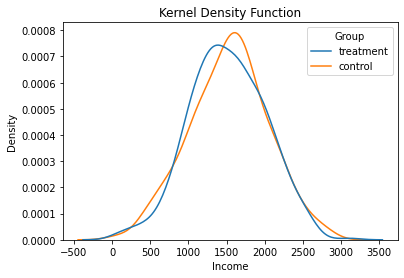

In [5]:
sns.kdeplot(x='Income', data=df, hue='Group', common_norm=False)
plt.title("Kernel Density Function")

Text(0.5, 1.0, 'Cumulative distribution function')

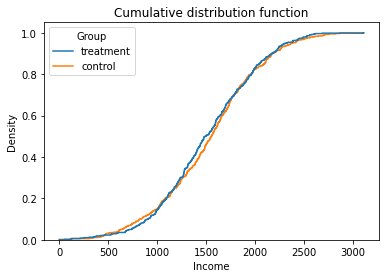

In [6]:
sns.histplot(x='Income', data=df, hue='Group', bins=len(df), stat="density", 
             element="step", fill=False, cumulative=True, common_norm=False)
plt.title("Cumulative distribution function")

Text(0.5, 1.0, 'QQ plot')

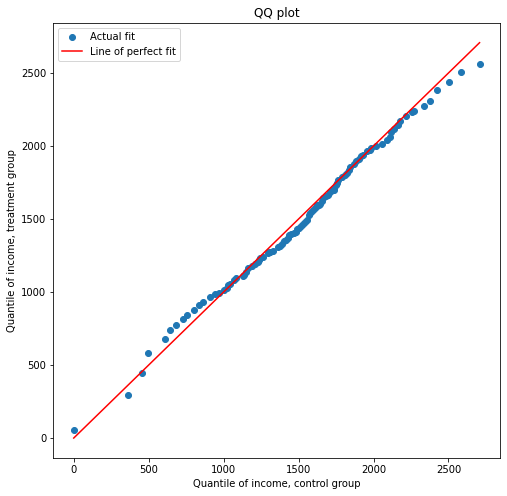

In [8]:
income = df['Income'].values 
income_t = df.loc[df.Group=='treatment', 'Income'].values 
income_c = df.loc[df.Group=='control', 'Income'].values 
 
df_pct = pd.DataFrame() 
df_pct['q_treatment'] = np.percentile(income_t, range(100)) 
df_pct['q_control'] = np.percentile(income_c, range(100))

plt.figure(figsize=(8, 8)) 
plt.scatter(x='q_control', y='q_treatment', data=df_pct, label='Actual fit'); 
sns.lineplot(x='q_control', y='q_control', data=df_pct, color='r', label='Line of perfect fit'); 
plt.xlabel('Quantile of income, control group') 
plt.ylabel('Quantile of income, treatment group') 
plt.legend() 
plt.title("QQ plot")